In [1]:
#@title

!pip install pythainlp
!pip install deepcut
!pip install emoji

     |████████████████████████████████| 10.6MB 6.2MB/s 
     |████████████████████████████████| 747kB 40.4MB/s 
     |████████████████████████████████| 2.0MB 5.3MB/s 
     |████████████████████████████████| 133kB 5.0MB/s 


## **Thai army IO twitter data analysis**


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from datetime import date
from datetime import datetime
import datetime
import calendar

import re
import nltk
import emoji
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize
from wordcloud import WordCloud


In [3]:
front = '/content/drive/My Drive/datasets/front/THSarabunNew.ttf'
IO_tweet = pd.read_csv('/content/drive/My Drive/datasets/IO twitter/thailand_092020_tweets_csv_hashed.csv', encoding='utf-8', index_col=0, parse_dates=['tweet_time'])
IO_user = pd.read_csv('/content/drive/My Drive/datasets/IO twitter/thailand_092020_users_csv_hashed.csv', encoding='utf-8', index_col=0, parse_dates=['account_creation_date'])

th_stop = tuple(thai_stopwords())
mpl.font_manager.fontManager.addfont(front)
mpl.rc('font', family='TH Sarabun New', size=20)

In [4]:
IO_tweet.head()

,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,account_language,tweet_language,tweet_text,tweet_time,tweet_client_name,in_reply_to_userid,in_reply_to_tweetid,quoted_tweet_tweetid,is_retweet,retweet_userid,retweet_tweetid,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions
tweetid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1196659470232772609,tGpRofwHLXI5iuye+ZDKVW8yVCic9mkRLxTwiBbEOrU=,tGpRofwHLXI5iuye+ZDKVW8yVCic9mkRLxTwiBbEOrU=,tGpRofwHLXI5iuye+ZDKVW8yVCic9mkRLxTwiBbEOrU=,NaN,NaN,NaN,0,3,2019-11-05,en,th,กกต.จี้“อนาคตใหม่”แจงเงินกู้“ธนาธร” https://t....,2019-11-19 05:20:00,Twitter Web Client,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0,0,0,1,[],['https://www.thansettakij.com/content/politic...,[]
1197369086662987776,tGpRofwHLXI5iuye+ZDKVW8yVCic9mkRLxTwiBbEOrU=,tGpRofwHLXI5iuye+ZDKVW8yVCic9mkRLxTwiBbEOrU=,tGpRofwHLXI5iuye+ZDKVW8yVCic9mkRLxTwiBbEOrU=,NaN,NaN,NaN,0,3,2019-11-05,en,th,ตายสนิท!'อิศรา'เปิดภ.ง.ด.91ปี61'คุณช่อ'แจ้งราย...,2019-11-21 04:20:00,Twitter Web Client,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0,0,0,0,[],['https://www.thaipost.net/main/detail/49119?f...,[]
1195602319892594693,hfg2zB3w3Ms2yTAnnRWD3XtVmgsIhmP+FKfELGctzU=,hfg2zB3w3Ms2yTAnnRWD3XtVmgsIhmP+FKfELGctzU=,hfg2zB3w3Ms2yTAnnRWD3XtVmgsIhmP+FKfELGctzU=,NaN,ก็ไม่มีรัยมากนะ,NaN,0,3,2019-11-05,th,und,Let's Get It : ชีวิตติดใบแดง CD กันต์ธีร์ EP....,2019-11-16 07:19:00,Twitter Web Client,NaN,NaN,NaN,False,NaN,NaN,absent,absent,1,0,0,0,[],['https://youtu.be/3PL1_B6hGt4'],['10228272']
1204279208513392641,lktnIU8UKhYmk56OS2jEPjVTNidDUUnlrlDQCMRsPUA=,lktnIU8UKhYmk56OS2jEPjVTNidDUUnlrlDQCMRsPUA=,lktnIU8UKhYmk56OS2jEPjVTNidDUUnlrlDQCMRsPUA=,NaN,NaN,NaN,17,38,2019-10-01,th,th,อ้าวเฮ้ย ไม่เหมือนที่คุยกันไว้นี่หว่า...อุตส่า...,2019-12-10 05:58:00,Twitter Web App,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0,0,0,0,[],['https://m.youtube.com/watch?v=zTOfftM62fQ&fe...,[]
1227886730948169729,AY56F7lcfIPCx1p6y5EFqbfw3CfIBpQLhW6oVmcI7og=,AY56F7lcfIPCx1p6y5EFqbfw3CfIBpQLhW6oVmcI7og=,AY56F7lcfIPCx1p6y5EFqbfw3CfIBpQLhW6oVmcI7og=,NaN,NaN,NaN,5,42,2020-01-14,th,th,เป้นกำลังใจให้นะท่าน,2020-02-13 09:26:00,Twitter Web App,NaN,NaN,1.226497e+18,False,NaN,NaN,absent,absent,0,0,0,0,[],[],[]


In [5]:
IO_user.head()

,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,account_language
userid,,,,,,,,,
vhWtzcFy+XfbYd9IsXBhcnTpinSnq2Kk0DNa7LHaMF8=,vhWtzcFy+XfbYd9IsXBhcnTpinSnq2Kk0DNa7LHaMF8=,vhWtzcFy+XfbYd9IsXBhcnTpinSnq2Kk0DNa7LHaMF8=,NaN,NaN,NaN,0,0,2019-12-08,en
4Rg8F1jBZL0lsBk9i4THbOAa3qpwv+36xYV7mQ1I+Y=,4Rg8F1jBZL0lsBk9i4THbOAa3qpwv+36xYV7mQ1I+Y=,4Rg8F1jBZL0lsBk9i4THbOAa3qpwv+36xYV7mQ1I+Y=,NaN,เออว่ะ,NaN,0,9,2020-01-14,en
oWcI1PuaMbdZ4nfIREa7ZojYaIKL6tAyWha+EpCqqKQ=,oWcI1PuaMbdZ4nfIREa7ZojYaIKL6tAyWha+EpCqqKQ=,oWcI1PuaMbdZ4nfIREa7ZojYaIKL6tAyWha+EpCqqKQ=,NaN,ตระกร้อ,NaN,0,2,2019-12-09,en
eOifAtqkh40ODUQORKICOfeOOJKArKgN0crN10+5ANo=,eOifAtqkh40ODUQORKICOfeOOJKArKgN0crN10+5ANo=,eOifAtqkh40ODUQORKICOfeOOJKArKgN0crN10+5ANo=,NaN,NaN,NaN,0,3,2020-01-14,th
ZCwPu1KjYq4RigpLALGmqbDVVCRi1cg86J6k8eMfA=,ZCwPu1KjYq4RigpLALGmqbDVVCRi1cg86J6k8eMfA=,ZCwPu1KjYq4RigpLALGmqbDVVCRi1cg86J6k8eMfA=,NaN,NaN,NaN,0,1,2019-12-08,en


In [6]:
IO_tweet['tweet_time'] = IO_tweet.tweet_time.dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')

## User

In [7]:
mask = (IO_user['account_creation_date'] > '2017-1-1') & (IO_user['account_creation_date'] <= '2020-5-1')
IO_user_index = IO_user.loc[mask]
user_date_count = IO_user_index['account_creation_date'].dt.date.value_counts()

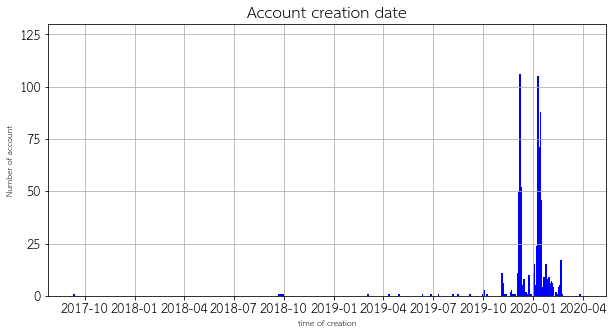

In [8]:

fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
plt.grid()
ax.bar(user_date_count.index, list(user_date_count.values), color = 'b', width=3)
ax.set_ylabel('Number of account', fontsize=12)
ax.set_xlabel('time of creation', fontsize=12)
ax.set_title("Account creation date")
ax.set(ylim=(0, 130))
plt.show()


In [9]:
mask_mos = (IO_user['account_creation_date'] > '2019-12-1') & (IO_user['account_creation_date'] <= '2020-2-1')
IO_user_mos= IO_user.loc[mask_mos]  
num_user = IO_user_mos.shape[0]/IO_user.shape[0] *100
num_user

85.63714902807776

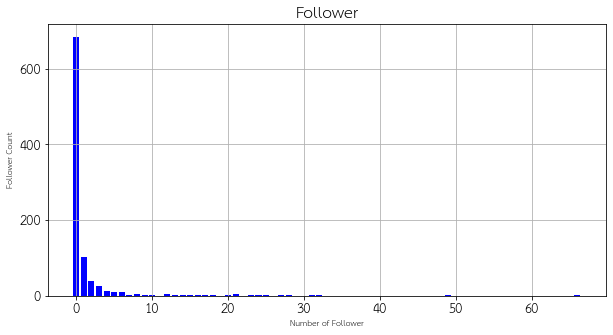

In [10]:
user_follwer = IO_user.follower_count.value_counts()
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
plt.grid()
ax.bar(user_follwer.index, list(user_follwer.values), color = 'b')
ax.set_ylabel('Follower Count', fontsize=12)
ax.set_xlabel('Number of Follower', fontsize=12)
ax.set_title("Follower")

plt.show()

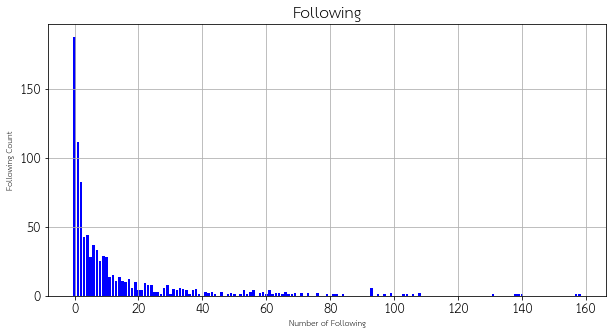

In [11]:
user_follwing = IO_user.following_count.value_counts()
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
plt.grid()
ax.bar(user_follwing.index, list(user_follwing.values), color = 'b')
ax.set_ylabel('Following Count', fontsize=12)
ax.set_xlabel('Number of Following', fontsize=12)
ax.set_title("Following")

plt.show()

### **Tweet**

In [12]:
year = [2015, 2016, 2017, 2018]
for i in year:
  IO_tweet = IO_tweet.drop(IO_tweet[IO_tweet['tweet_time'].dt.year.values == [i]].index)

korat_shoting = date(year=2020, month=2, day=9)
FFP_dissolved = date(year=2020, month=2, day=21)
Flash_Mob = date(year=2020, month=2, day=25)

In [13]:

mask = (IO_tweet['tweet_time'] > '2019-10-1') & (IO_tweet['tweet_time'] <= '2020-4-1')
IO_index = IO_tweet.loc[mask]
tweet_date_count = IO_index['tweet_time'].dt.date.value_counts()


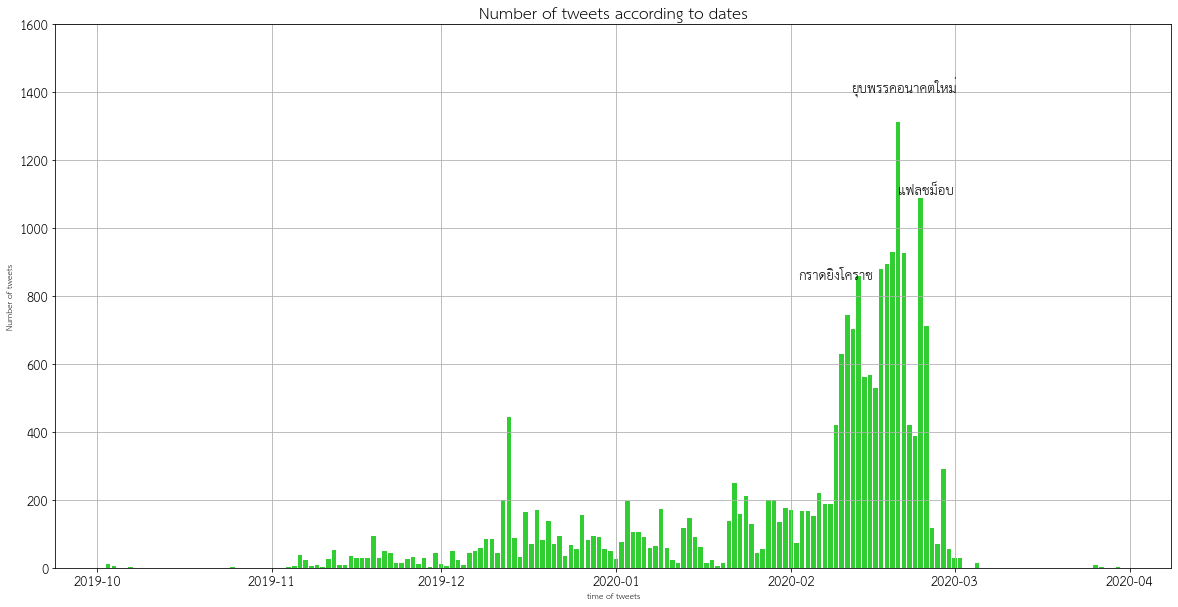

In [14]:

fig = plt.figure(figsize=(20,10)) 
ax = fig.add_subplot(111)
plt.grid()
ax.bar(tweet_date_count.index, list(tweet_date_count.values), color = 'limegreen')
ax.set_ylabel('Number of tweets', fontsize=12)
ax.set_xlabel('time of tweets', fontsize=12)
ax.set_title("Number of tweets according to dates")
ax.set(ylim=(0, 1600))
ax.text(korat_shoting, 850 , 'กราดยิงโคราช', fontsize=20, ha='center')
ax.text(FFP_dissolved, 1400 , 'ยุบพรรคอนาคตใหม่', fontsize=20, ha='center')
ax.text(Flash_Mob, 1100 , 'แฟลชม็อบ', fontsize=20, ha='center')
plt.show()


In [16]:
IO_tweet['dayofweek'] = IO_tweet.tweet_time.dt.dayofweek
IO_tweet['hour'] = IO_tweet.tweet_time.dt.hour
IO_tweet['date'] = IO_tweet.tweet_time.dt.date
time_offi = IO_tweet[['tweet_time', 'dayofweek', 'hour', 'date']]
data = time_offi.groupby(["dayofweek", 'hour']).size()
data = data.reset_index().rename(columns = {0 : 'Count'})
data = data.sort_values(by='dayofweek')
pivot = data.pivot_table(values= 'Count', index= 'dayofweek', columns= 'hour', fill_value=0)

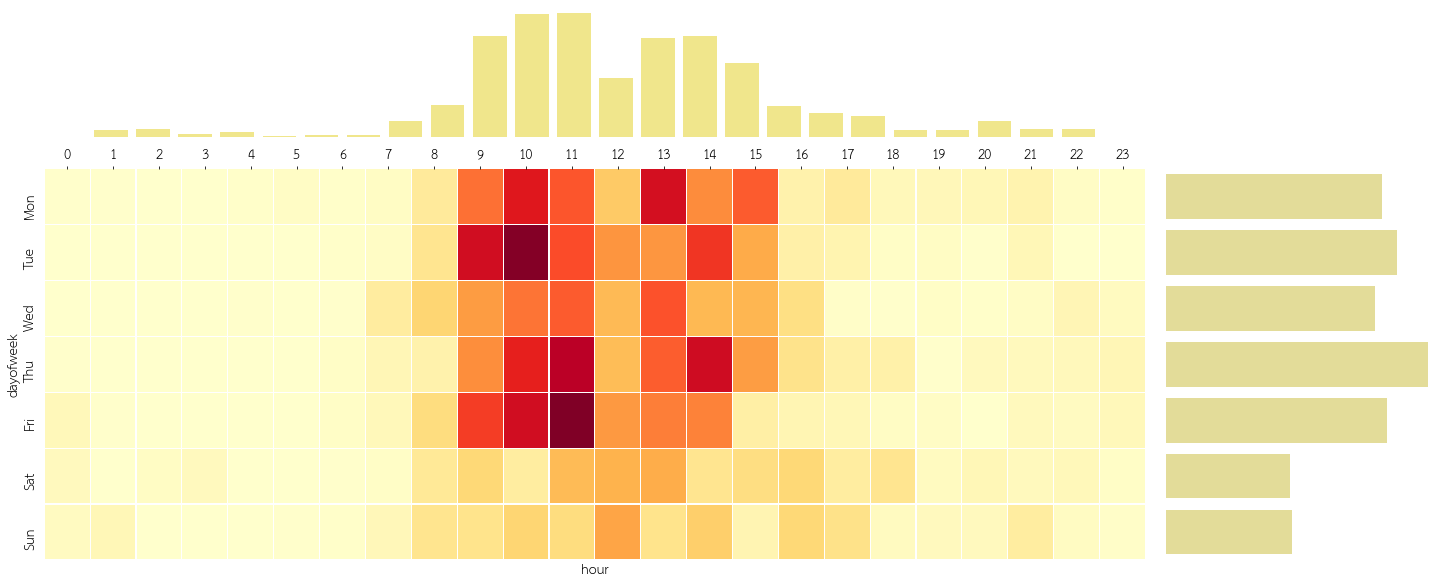

In [19]:
fig, axs=plt.subplots(2,2,figsize=(20,8), gridspec_kw={'hspace': 0, 
                                                        'wspace': 0,
                                                        'width_ratios': [4, 1],
                                                        'height_ratios': [1, 3]},
                                                        constrained_layout = True)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[1,1].axis("off")

axs[0, 0].bar(data.hour, data.Count, color='khaki')

days = 'Mon Tue Wed Thu Fri Sat Sun'.split()
sns.heatmap(pivot, yticklabels=days, linewidths=0.1, 
             cmap='YlOrRd', cbar=False, ax=axs[1, 0])
axs[1, 0].tick_params(left=False, bottom=False, top=True, 
               labelbottom=False, labeltop=True)

sns.barplot(x='Count', y='dayofweek', data=data, 
             color='khaki', ax=axs[1, 1], orient = 'h', ci=None)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


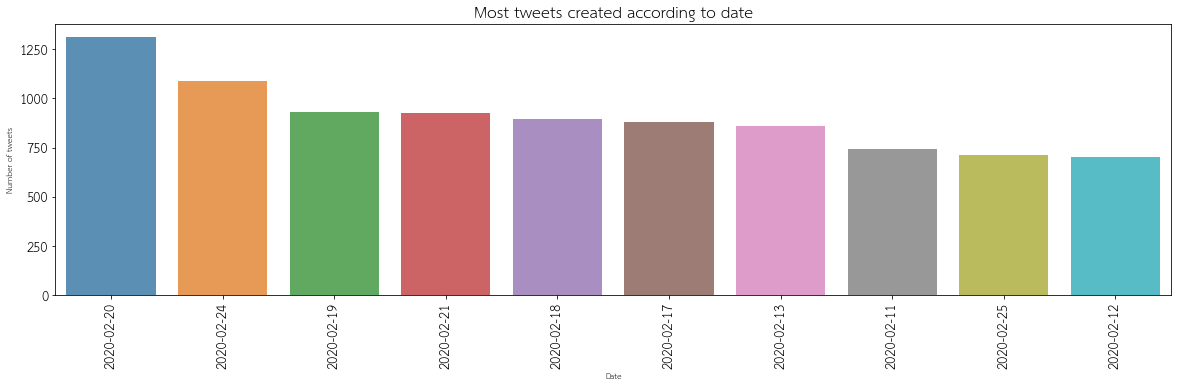

In [24]:
count_  = IO_tweet['tweet_time'].dt.date.value_counts()
count_ = count_[:10,]
plt.figure(figsize=(20,5))
sns.barplot(count_.index, count_.values, alpha=0.8)
plt.title('Most tweets created according to date')
plt.xticks(rotation='vertical')
plt.ylabel('Number of tweets', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.show()

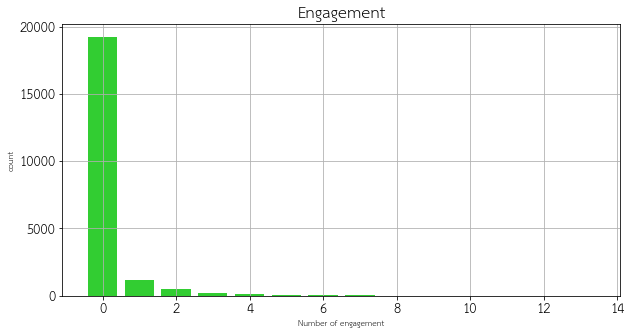

In [25]:
IO_tweet['engage'] = IO_tweet[['reply_count', 'like_count', 'retweet_count']].sum(axis=1)
engage = IO_tweet['engage'].value_counts()
engage = engage[engage.values != 1]
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
plt.grid()
ax.bar(engage.index, list(engage.values), color = 'limegreen')
ax.set_ylabel('count', fontsize=12)
ax.set_xlabel('Number of engagement', fontsize=12)
ax.set_title("Engagement")
plt.show()

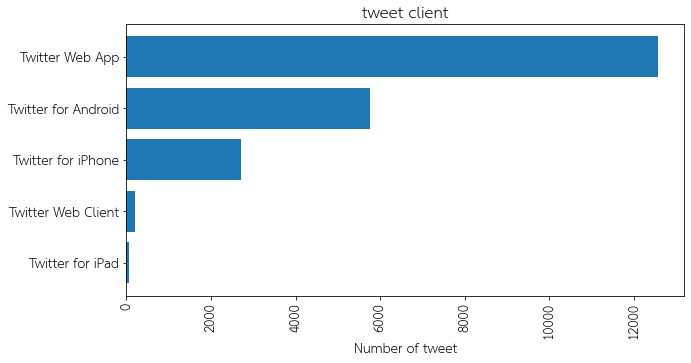

In [26]:
IO_tweet.tweet_client_name.value_counts()
tweet_client = IO_tweet.tweet_client_name.value_counts()
client_word = pd.DataFrame(data = tweet_client)
client_word = client_word.iloc[:5].sort_values(by='tweet_client_name')

plt.figure(figsize=(10, 5))
plt.barh(client_word.index, client_word.tweet_client_name)
plt.title('tweet client')
plt.xlabel('Number of tweet')
plt.xticks(rotation='vertical')
plt.show()

## **Mention**


In [27]:
mention = []
for index, s in IO_tweet.tweet_text.iteritems():
    result = re.findall("\s([@][\w_-]+)", s)
    mention.append(','.join(result))


In [28]:
IO_tweet['mention'] = IO_tweet.tweet_text.str.findall(r'@([^\s:]+)').apply(','.join)
mention = IO_tweet[IO_tweet['mention'] != '']['mention']

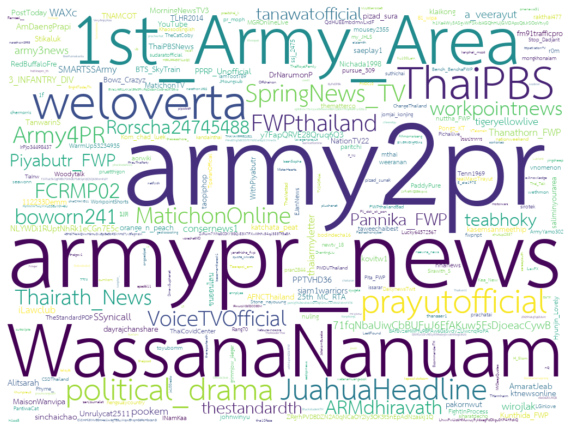

In [65]:
wordcloud_mention = WordCloud(font_path=front,
                      stopwords = '\'',
                      max_words=300,
                      contour_width=1,
                      background_color="white",
                      width=1024, 
                      height=768,
                      collocations=False,
                      ).generate(' '.join(mention))



def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(10,10))
    plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud_mention)

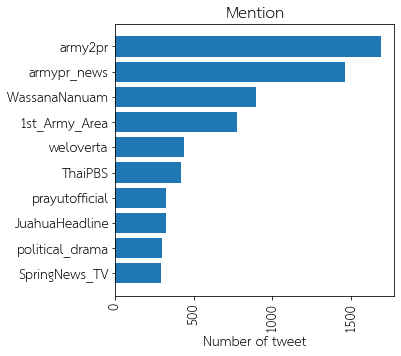

In [69]:
mention_count = mention.value_counts()

mention_word_count = pd.DataFrame(data = mention_count)
mention_top = mention_word_count.iloc[:10].sort_values(by='mention')

plt.figure(figsize=(5,5))
plt.barh(mention_top.index, mention_top.mention)
plt.title('Mention')
plt.xlabel('Number of tweet')
plt.xticks(rotation='vertical')
plt.show()


## Hashtag

In [31]:
hashtags = IO_tweet[IO_tweet['hashtags'] != r'[]']['hashtags']
hashtags = [re.sub('[\[\]\']', '', txt) for txt in hashtags]

hashtags[:15]

['ทํางานวนไป, อนาคตใหม่',
 'กองทัพบกห่วงใยประชาชน, กองทัพบกเพื่อประชาชน',
 'พรรคอนาคตใหม่',
 'อนคตไหม้',
 'รักทหารไทย',
 'เนรคุณแผ่นดิน, ติ่งควายส้ม',
 'ทหารใหม่, น้องคนเล็ก, กองทัพบก, popapanda, letsgetit, ชีวิตติดใบแดง, CDGT, cdguntee',
 'saoalicization',
 'อิช่อ, อนาคตดับ',
 'กองทัพบกห่วงใยประชาชน',
 'พรรคอนาคตไหม้',
 'กองทัพบก',
 'ทรงพระเจริญ',
 'ธนาธรจึงรุ่งเรืองกิจ',
 'ประชาธิปไตยจอมปลอม, ความเน่าเหม็นในอนาคตใหม่']

In [32]:
hashtags_cut = [word_tokenize(txt,engine='newmm') for txt in hashtags]
hashtags_j = [''.join(txt) for txt in hashtags_cut]


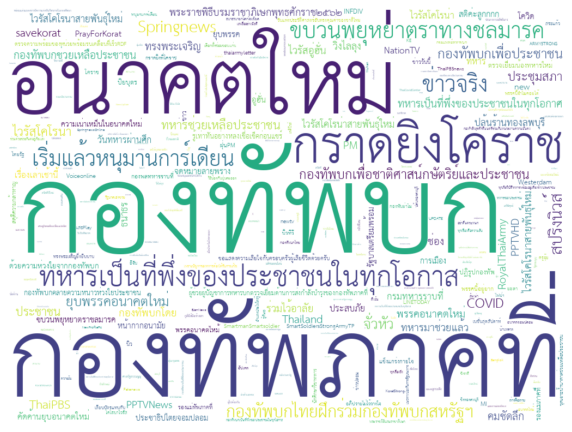

In [64]:
wordcloud_hashtags = WordCloud(font_path=front,
                      stopwords = th_stop,
                      max_words=300,
                      contour_width=3,
                      background_color="white",
                      regexp=r"[\u0E00-\u0E7Fa-zA-Z']+",
                      width=1024, 
                      height=768,
                      collocations=False,
                      ).generate(' '.join(hashtags_j))



def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(10,10))
    plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud_hashtags)

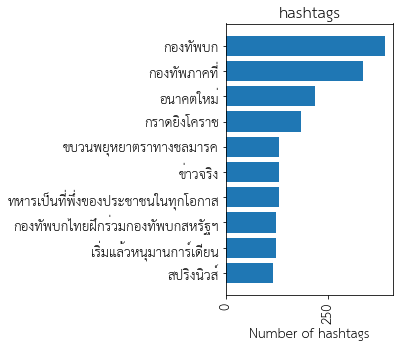

In [71]:
wordcloud_hashtags_count = WordCloud(font_path=front,
                      stopwords = th_stop,
                      min_font_size = 10,
                      background_color="white",
                      colormap='Set2',
                      regexp=r"[\u0E00-\u0E7Fa-zA-Z']+",
                      width=1024, 
                      height=768,
                      collocations=False,
                      ).process_text(' '.join(hashtags_j))

hashtags_word_count = pd.DataFrame(data = wordcloud_hashtags_count.items(), columns=['Word', 'Count'])
hashtags_word_count = hashtags_word_count.sort_values(by='Count', ascending=False)
hashtags_top = hashtags_word_count.iloc[:10].sort_values(by='Count')

plt.figure(figsize=(3,5))
plt.barh(hashtags_top.Word, hashtags_top.Count)
plt.title('hashtags')
plt.xlabel('Number of hashtags')
plt.xticks(rotation='vertical')
plt.show()


## Tweet text

In [35]:

text_tweet = [','.join(txt) for txt in IO_tweet.tweet_text]

In [36]:
def cleaner(tweet):
    tweet = re.sub("\s([@#][\w_-]+)","",tweet) #ลบmention และ hashtag
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #ลบ http links
    tweet = re.sub("[RT]", "", tweet)  #ลบรีทวิต
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #ลบอีโมจิ
    return tweet


th_stop = tuple(thai_stopwords())
def split_word(text):
            
    tokens = word_tokenize(text,engine='newmm')
    
    tokens = [i for i in tokens if not i in th_stop]

    tokens = [i for i in tokens if not i.isnumeric()]

    return tokens

In [37]:
IO_tweet['tweet_text_clean'] = IO_tweet['tweet_text'].map(lambda x: cleaner(x))
tokens_tweet = split_word(' '.join(IO_tweet['tweet_text_clean']))

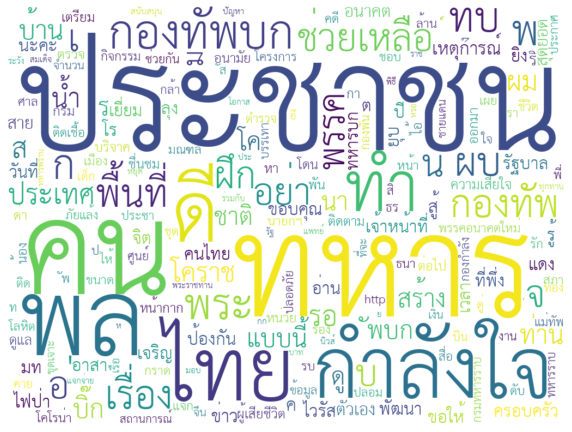

In [66]:
wordcloud_text = WordCloud(font_path=front,
                      stopwords = th_stop,
                      min_font_size = 10,
                      background_color="white",

                      regexp=r"[\u0E00-\u0E7Fa-zA-Z']+",
                      width=1024, 
                      height=768,
                      collocations=False,
                      ).generate(' '.join(tokens_tweet))

def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(10,10))
    plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud_text)


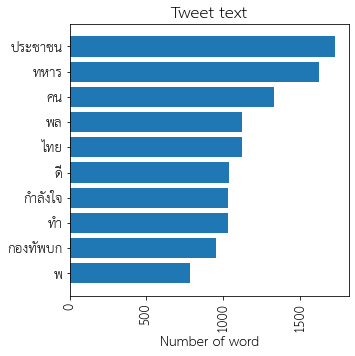

In [61]:
wordcloud_tweet_count = WordCloud(font_path=front,
                      stopwords = th_stop,
                      min_font_size = 10,
                      background_color="black",
                      colormap='Set2',
                      regexp=r"[\u0E00-\u0E7Fa-zA-Z']+",
                      width=1024, 
                      height=768,
                      collocations=False,
                      ).process_text(' '.join(tokens_tweet))

tweet_word_count = pd.DataFrame(data = wordcloud_tweet_count.items(), columns=['Word', 'Count'])
tweet_word_count = tweet_word_count.sort_values(by='Count', ascending=False)
tweet_word_count = tweet_word_count.iloc[:10].sort_values(by='Count')

plt.figure(figsize=(5,5))
plt.barh(tweet_word_count.Word, tweet_word_count.Count)
plt.title('Tweet text')
plt.xlabel('Number of word')
plt.xticks(rotation='vertical')
plt.show()
